# Import and save the health regions data

source (using 2019*): https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais

*buscar a malha municipal para os outros anos (2000, 2005, 2010, 2015-2019), quando necessario

In [9]:

# choosing the Brazilian state (e.g. 'AM', 'PA', BA', 'SP', 'RJ')

UF = 'SP'


# choosing the IBGE municipalities dataset year (e.g. '2017 CD_GEOCMU', RJ,SP,CE:'2021 CD_MUN', RS:'2020 CD_MUN')

year = 2021
cod = 'CD_MUN'


In [10]:
import geopandas as gpd
import numpy as np
import pandas as pd

# this file contains the health regions partitions from 2011 to 2017
regions = pd.read_csv("../data/panel_mun_cir.csv", encoding = "ISO-8859-1")

# import the municipalities shapes
mun_df_original = gpd.read_file("../data/%s/%s_Municipios_%d.dbf"%(UF, UF, year))
mun_df_original[cod] = np.array([item[:-1] for item in np.array(mun_df_original[cod])]).astype('int') # trim last char

mun_df_original

CD_MUN            NM_MUN SIGLA  AREA_KM2  \
0    350010        Adamantina    SP   411.987   
1    350020            Adolfo    SP   211.055   
2    350030             Aguaí    SP   474.554   
3    350040    Águas da Prata    SP   142.673   
4    350050  Águas de Lindóia    SP    60.126   
..      ...               ...   ...       ...   
640  355700        Votorantim    SP   184.186   
641  355710       Votuporanga    SP   420.703   
642  355715          Zacarias    SP   319.056   
643  355720         Chavantes    SP   188.727   
644  355730      Estiva Gerbi    SP    74.144   

                                              geometry  
0    POLYGON ((-51.05425 -21.40465, -51.05300 -21.4...  
1    POLYGON ((-49.65795 -21.20333, -49.65645 -21.2...  
2    POLYGON ((-46.97640 -21.96818, -46.97599 -21.9...  
3    POLYGON ((-46.73501 -21.81891, -46.73431 -21.8...  
4    POLYGON ((-46.60614 -22.44173, -46.60347 -22.4...  
..                                                 ...  
640  POLYGON ((-47.37440 -23.52042, -47.37444 -23.5...  
641  POLYGON ((-50.02121 -20.33394, -50.02084 -20.3...  
642  POLYGON ((-49.99275 -21.03884, -49.99214 -21.0...  
643  POLYGON ((-49.68630 -22.93787, -49.68446 -22.9...  
644  POLYGON ((-46.93970 -22.18520, -46.93879 -22.1...  

[645 rows x 5 columns]

In [11]:
regions

file_date  UF             CIRNOME  CODMUN         NOMEMUN  \
0       2011-12-01  AC           Alto Acre  120005    Assis Brasil   
1       2011-12-01  AC           Alto Acre  120010       Brasiléia   
2       2011-12-01  AC           Alto Acre  120025  Epitaciolândia   
3       2011-12-01  AC           Alto Acre  120070          Xapuri   
4       2011-12-01  AC  Baixo Acre e Purus  120001      Acrelândia   
...            ...  ..                 ...     ...             ...   
161456  2017-07-26  GO          Centro Sul  522200      Vianópolis   
161457  2017-07-26  GO          Centro Sul  522205  Vicentinópolis   
161458  2017-07-26  GO       Entorno Norte  522220        Vila Boa   
161459  2017-07-26  GO        São Patrício  522230   Vila Propício   
161460  2017-07-26  DF    Distrito Federal  530010        Brasília   

            CIRNOME_sig    NOMEMUN_sig  date_idx  CIRNOME_sig_mod  \
0              altoacre    assisbrasil         1         altoacre   
1              altoacre       brasilia         1         altoacre   
2              altoacre  epitaciolndia         1         altoacre   
3              altoacre         xapuri         1         altoacre   
4       baixoacreepurus      acrelndia         1  baixoacreepurus   
...                 ...            ...       ...              ...   
161456        centrosul      vianpolis        29        centrosul   
161457        centrosul  vicentinpolis        29        centrosul   
161458     entornonorte        vilaboa        29     entornonorte   
161459        sopatrcio    vilapropcio        29        sopatrcio   
161460  distritofederal        braslia        29  distritofederal   

                CIR_id      CIR_id_old  new_mun  
0         AC0005007027   1200051200704        0  
1         AC0005007027   1200051200704        0  
2         AC0005007027   1200051200704        0  
3         AC0005007027   1200051200704        0  
4         AC0001008036  12000112008010        0  
...                ...             ...      ...  
161456  GO014022051198  52014052220525        0  
161457  GO014022051198  52014052220525        0  
161458  GO001722201005   5200175222208        0  
161459  GO032022301413  52032052223026        0  
161460    DF0010001010   5300105300101        0  

[161461 rows x 12 columns]

In [12]:
this_year = 2017 #between 2011 and 2017

upper_limit = regions['file_date'] < str(this_year+1) 
lower_limit = regions['file_date'] > str(this_year)

is_this_year = np.logical_and(upper_limit, lower_limit)
regions_this_year = regions[is_this_year]

last_update_date = np.unique(regions_this_year['file_date'])[-1]

regions_last_update = regions_this_year[regions_this_year['file_date']==last_update_date]

regions_df = regions_last_update[regions_last_update['UF'] == UF]

In [13]:
mun_df = mun_df_original.merge(regions_df[['CODMUN','CIRNOME']], 
                                        how = 'left', left_on = [cod], 
                                        right_on = ['CODMUN'])
mun_df = mun_df.rename(columns={'CIRNOME': 'region'})
mun_df = mun_df.drop(columns=['CODMUN'])

mun_df

CD_MUN            NM_MUN SIGLA  AREA_KM2  \
0    350010        Adamantina    SP   411.987   
1    350020            Adolfo    SP   211.055   
2    350030             Aguaí    SP   474.554   
3    350040    Águas da Prata    SP   142.673   
4    350050  Águas de Lindóia    SP    60.126   
..      ...               ...   ...       ...   
640  355700        Votorantim    SP   184.186   
641  355710       Votuporanga    SP   420.703   
642  355715          Zacarias    SP   319.056   
643  355720         Chavantes    SP   188.727   
644  355730      Estiva Gerbi    SP    74.144   

                                              geometry          region  
0    POLYGON ((-51.05425 -21.40465, -51.05300 -21.4...      Adamantina  
1    POLYGON ((-49.65795 -21.20333, -49.65645 -21.2...  José Bonifácio  
2    POLYGON ((-46.97640 -21.96818, -46.97599 -21.9...     Mantiqueira  
3    POLYGON ((-46.73501 -21.81891, -46.73431 -21.8...     Mantiqueira  
4    POLYGON ((-46.60614 -22.44173, -46.60347 -22.4...        Campinas  
..                                                 ...             ...  
640  POLYGON ((-47.37440 -23.52042, -47.37444 -23.5...        Sorocaba  
641  POLYGON ((-50.02121 -20.33394, -50.02084 -20.3...     Votuporanga  
642  POLYGON ((-49.99275 -21.03884, -49.99214 -21.0...  José Bonifácio  
643  POLYGON ((-49.68630 -22.93787, -49.68446 -22.9...        Ourinhos  
644  POLYGON ((-46.93970 -22.18520, -46.93879 -22.1...   Baixa Mogiana  

[645 rows x 6 columns]

In [14]:
def remove_things(x):
    if str(x)[0].isnumeric():
        return " ".join(x.split()[2:])
    return x
         
mun_df['region'] = mun_df['region'].apply(remove_things)

In [15]:
mun_df[['CD_MUN', 'region']] 

CD_MUN          region
0    350010      Adamantina
1    350020  José Bonifácio
2    350030     Mantiqueira
3    350040     Mantiqueira
4    350050        Campinas
..      ...             ...
640  355700        Sorocaba
641  355710     Votuporanga
642  355715  José Bonifácio
643  355720        Ourinhos
644  355730   Baixa Mogiana

[645 rows x 2 columns]

In [16]:
# mun_df[['CD_MUN', 'region']].to_csv("../data/%s/regions/%s_regions_table_%d.csv"%(UF, UF, this_year), index=False)

--------------------------------

In [47]:
test = mun_df[['region', 'geometry']].dissolve(by='region')
test

geometry
region                                                                 
Baia da Ilha Grande   MULTIPOLYGON (((-44.09086 -23.17342, -44.09087...
Baixada de Litorânea  MULTIPOLYGON (((-42.47595 -22.94016, -42.47614...
Centro-Sul            POLYGON ((-43.37027 -22.45171, -43.36990 -22.4...
Metropolitana I       MULTIPOLYGON (((-43.83480 -23.11577, -43.83492...
Metropolitana II      MULTIPOLYGON (((-42.92913 -23.02492, -42.92913...
Médio Paraíba         POLYGON ((-43.87378 -22.80913, -43.87389 -22.8...
Noroeste              POLYGON ((-41.93683 -21.63108, -41.93687 -21.6...
Norte                 MULTIPOLYGON (((-41.75899 -22.38469, -41.75914...
Serrana               POLYGON ((-41.96177 -22.07787, -41.96193 -22.0...

In [48]:
from shapely.ops import cascaded_union, unary_union
from shapely.geometry import Polygon

regions_boundary = []
year_regionalization = {region_name:"" for region_name in mun_df[mun_df['region'].notna()]['region'].unique()}

for region in mun_df[mun_df['region'].notna()]['region'].unique():
    mun_polygons = mun_df[mun_df['region']==region]['geometry'].values
    region_polygon = unary_union(mun_polygons)

    if region_polygon.type == 'MultiPolygon':
        poly = Polygon(max(region_polygon, key=lambda a: a.area).exterior)
        regions_boundary.append(poly)
    else:
        poly = Polygon(region_polygon.exterior)
        regions_boundary.append(poly)
    year_regionalization[region] = [region_polygon.centroid.xy[0][0], region_polygon.centroid.xy[1][0]]

In [49]:
year_regionalization

{'Baia da Ilha Grande': [-44.45314063011599, -23.05196154509547],
 'Noroeste': [-41.906199619364045, -21.33175966568388],
 'Baixada de Litorânea': [-42.193173616566696, -22.70809245782076],
 'Centro-Sul': [-43.31726985670887, -22.273706159914614],
 'Médio Paraíba': [-44.071129153254134, -22.44086387952304],
 'Metropolitana I': [-43.452516391538666, -22.774875353530536],
 'Serrana': [-42.54039694367837, -22.19680416944706],
 'Norte': [-41.502086703490704, -21.829301970849006],
 'Metropolitana II': [-42.66823186046177, -22.7233158860132]}

In [50]:
mun_df['latlong'] = mun_df['region'].map(lambda r: year_regionalization[r])

In [51]:
# mun_df[['CD_MUN', 'region', 'latlong']].to_csv("../data/%s/regions/regions_latlong_%d.csv"%(UF, this_year), index=False)

In [52]:
mun_df[['CD_MUN', 'region', 'latlong']]

CD_MUN                region                                    latlong
0   330010   Baia da Ilha Grande   [-44.45314063011599, -23.05196154509547]
1   330015              Noroeste  [-41.906199619364045, -21.33175966568388]
2   330020  Baixada de Litorânea  [-42.193173616566696, -22.70809245782076]
3   330022            Centro-Sul  [-43.31726985670887, -22.273706159914614]
4   330023  Baixada de Litorânea  [-42.193173616566696, -22.70809245782076]
..     ...                   ...                                        ...
87  330600            Centro-Sul  [-43.31726985670887, -22.273706159914614]
88  330610         Médio Paraíba  [-44.071129153254134, -22.44086387952304]
89  330615              Noroeste  [-41.906199619364045, -21.33175966568388]
90  330620            Centro-Sul  [-43.31726985670887, -22.273706159914614]
91  330630         Médio Paraíba  [-44.071129153254134, -22.44086387952304]

[92 rows x 3 columns]

Text(0.5, 1.0, 'Health Regions in the State of RJ (9 regions)')

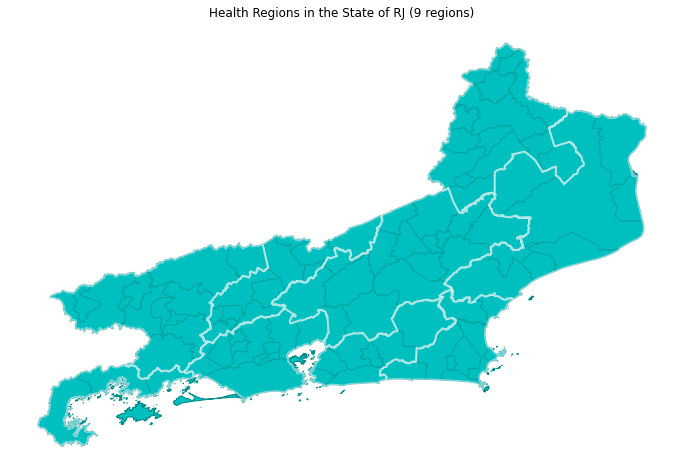

In [14]:
import matplotlib.pyplot as plt

# plot the health regions shape
fig, ax = plt.subplots(figsize=(12, 10))
gpd.GeoSeries(mun_df_original['geometry']).plot(ax=ax, color="c", edgecolor="darkcyan", lw=1)
gpd.GeoSeries(regions_boundary).plot(ax=ax, color="c", alpha=0.5, edgecolor="white", lw=2)
ax.axis("off")
plt.title("Health Regions in the State of %s (%d regions)"%(UF, len(regions_boundary)))
# plt.savefig("./regioes_%s.png"%UF, bbox_inches='tight')

In [53]:
regions_boundary

In [54]:
mun_df[mun_df['region'].notna()]['region'].unique()

array(['Baia da Ilha Grande', 'Noroeste', 'Baixada de Litorânea',
       'Centro-Sul', 'Médio Paraíba', 'Metropolitana I', 'Serrana',
       'Norte', 'Metropolitana II'], dtype=object)

In [15]:
# saving regions shape to file

gdf = gpd.GeoDataFrame({
    'name': mun_df[mun_df['region'].notna()]['region'].unique(),
    'geometry': regions_boundary
})

gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.01)
# gdf.to_file("../data/%s/regions/regions_%d.shp"%(UF, this_year))

In [16]:
boundary = cascaded_union(regions_boundary)


Text(0.5, 1.0, 'Health Regions in the State of RJ (9 regions)')

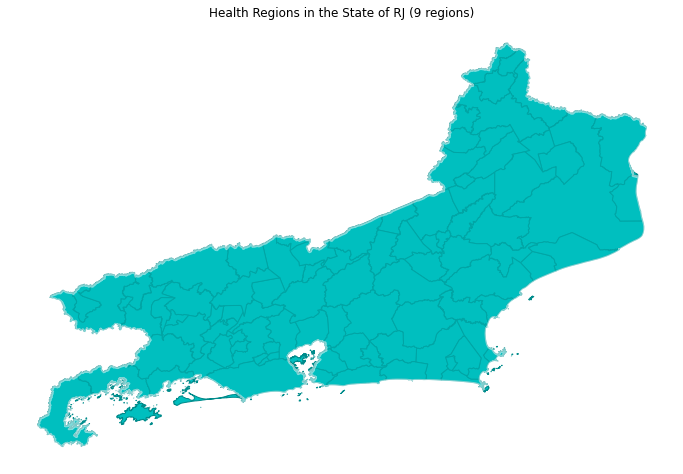

In [17]:
import matplotlib.pyplot as plt

# plot the health regions shape
fig, ax = plt.subplots(figsize=(12, 10))
gpd.GeoSeries(mun_df_original['geometry']).plot(ax=ax, color="c", edgecolor="darkcyan", lw=1)
gpd.GeoSeries(boundary).plot(ax=ax, color="c", alpha=0.5, edgecolor="white", lw=2)
ax.axis("off")
plt.title("Health Regions in the State of %s (%d regions)"%(UF, len(regions_boundary)))
# plt.savefig("./regioes_%s.png"%UF, bbox_inches='tight')

In [26]:
gdf = gpd.GeoDataFrame({
    'name': "Rio de Janeiro",
    'geometry': [boundary],
})

gdf['geometry'] = gdf['geometry'].simplify(tolerance=0.01)
gdf.to_file("../data/%s/state1.shp"%(UF))
gdf.to_file("../../dashboard-regionalizacao-sus/data/shapes/state1.shp")